In [1]:
import json
import numpy as np
import os

In [2]:
os.chdir("/home/alessio/Scrivania/SwitchingBandits")

# Both

In [6]:
paths_to_read_from = ['/experiments_estimation_error_rebuttal/2states_20actions_5obs__1_10']
bandit_num = 10

hmm_errors = np.empty((bandit_num, 3))
obs_errors = np.empty((bandit_num, 3))
our_errors = np.empty((bandit_num, 3))
estimated_obs = None
for i, path in enumerate(paths_to_read_from):

    curr_path = os.getcwd() + path
    for bandit in range(bandit_num):
        # Opening HMM files
        f = open(curr_path + f'/bandit{bandit}/exp_hmm_1/exp_info.json')
        # returns JSON object as
        # a dictionary
        data = json.load(f)

        num_samples_hmm = []
        obs_errors_hmm = []
        count = 0
        for exp in data:
            num_samples_hmm.append(exp['num_samples'])
            print(exp['norm_1_t_error'])
            hmm_errors[bandit, count] = exp['norm_1_t_error']
            # obs_errors[bandit, count] = exp['norm_1_o_error_norm']
            obs_errors[bandit, count] = exp['norm_1_o_error'] / (2 * 20)
            # if count == 0:
            #     print("holaa")
            #     estimated_obs = np.array(exp['O_hat']).reshape((100, 5))
            #     obs_permutation = exp['min_o_permutation']
            count += 1
        f.close()

        # Opening SR-EC files
        f = open(curr_path + f'/bandit{bandit}/exp2/exp_our_info.json')
        data = json.load(f)
        our_errors[bandit, :] = data['estimation_errors']
        f.close()

print(hmm_errors)
#print(obs_errors)
print(our_errors)
print(obs_errors)

0.006302935847129459
0.003553349244797971
0.0030070394549678026
0.00853284804437103
0.0035223621902714733
0.001304711739543045
0.1580062840358269
0.19240750563932635
0.11418036768795131
0.5869927488049526
0.593176280833599
0.600040562284182
0.45942413065244125
0.7807802430945154
0.708485455569585
0.2685477470308985
0.27816116712671696
0.2519418559098839
1.0115329185372561
1.0070716296588853
1.0027608830358934
0.025472078397249187
0.015012032792897166
0.00543752611505717
0.3133363494456619
0.3282835705270245
0.3240788045826617
0.06259666483287185
0.07143278725995911
0.06620563072569613
[[0.00630294 0.00355335 0.00300704]
 [0.00853285 0.00352236 0.00130471]
 [0.15800628 0.19240751 0.11418037]
 [0.58699275 0.59317628 0.60004056]
 [0.45942413 0.78078024 0.70848546]
 [0.26854775 0.27816117 0.25194186]
 [1.01153292 1.00707163 1.00276088]
 [0.02547208 0.01501203 0.00543753]
 [0.31333635 0.32828357 0.3240788 ]
 [0.06259666 0.07143279 0.06620563]]
[[0.00663849 0.00720496 0.00173068]
 [0.0661049

In [7]:
norm_hmm_errors = hmm_errors
hmm_mean_error = norm_hmm_errors.mean(axis=0)
hmm_std_error = norm_hmm_errors.std(axis=0)

norm_our_errors = our_errors
our_mean_error = norm_our_errors.mean(axis=0)
our_std_error = norm_our_errors.std(axis=0)

norm_obs_errors = obs_errors
obs_mean_error = norm_obs_errors.mean(axis=0)
obs_std_error = norm_obs_errors.std(axis=0)

print(f"Hmm mean error {hmm_mean_error} +- {hmm_std_error}")
print(f"Our mean error {our_mean_error} +- {our_std_error}")
print(f"Obs mean error {obs_mean_error} +- {obs_std_error}")

Hmm mean error [0.29007447 0.32734009 0.30774428] +- [0.30616027 0.33640321 0.33262993]
Our mean error [0.03195335 0.02287478 0.01988097] +- [0.01746495 0.01844619 0.01180228]
Obs mean error [0.04059397 0.03199058 0.03418751] +- [0.07348261 0.06056066 0.05982023]


In [6]:
print(obs_permutation)
np.sum(np.abs(estimated_obs[5:10, 3] - [0.0250374452194932, 0.8913456334386701, 0.02857625013543176, 0.013085643411875065, 0.04195502779452992]))

[3, 4, 1, 0, 2]


0.010767627752149367

# Our Only

In [44]:
paths_to_read_from = ['/experiments_estimation_error_rebuttal/10states_20actions_5obs__20_10']
bandit_num = 10

our_errors = np.empty((bandit_num, 4))
for i, path in enumerate(paths_to_read_from):

    curr_path = os.getcwd() + path
    for bandit in range(bandit_num):
        # Opening SR-EC files
        f = open(curr_path + f'/bandit{bandit}/exp1/exp_our_info.json')
        data = json.load(f)
        our_errors[bandit, :] = data['estimation_errors']
        f.close()

#print(obs_errors)
print(our_errors)

[[0.51304482 0.44468857 0.31208196 0.27538788]
 [0.48182251 0.31879766 0.33943144 0.29150435]
 [0.4319683  0.31999612 0.27134166 0.23785887]
 [0.47520491 0.33426022 0.2820916  0.26604329]
 [0.58771741 0.54637964 0.42483581 0.33570064]
 [0.44891643 0.34568396 0.28038927 0.22410097]
 [0.54184398 0.3353438  0.32106545 0.27959311]
 [0.51194751 0.39545752 0.31905625 0.22983837]
 [0.65927171 0.46495174 0.38418694 0.29061575]
 [0.46345527 0.41675891 0.39178056 0.32776841]]


In [45]:
norm_our_errors = our_errors
our_mean_error = norm_our_errors.mean(axis=0)
our_std_error = norm_our_errors.std(axis=0)

print(f"Our mean error {our_mean_error} +- {our_std_error}")

Our mean error [0.51151929 0.39223181 0.33262609 0.27584117] +- [0.06581587 0.07196364 0.04948209 0.03617936]


# HMM Only

In [31]:
paths_to_read_from = ['/experiments_estimation_error_rebuttal/3states_20actions_5obs__20_100']
bandit_num = 2

hmm_errors = np.empty((bandit_num, 1))
obs_errors = np.empty((bandit_num, 1))
estimated_obs = None
for i, path in enumerate(paths_to_read_from):

    curr_path = os.getcwd() + path
    for bandit in range(bandit_num):
        # Opening HMM files
        f = open(curr_path + f'/bandit{bandit}/exp_hmm_1/exp_info.json')
        # returns JSON object as
        # a dictionary
        data = json.load(f)

        num_samples_hmm = []
        obs_errors_hmm = []
        count = 0
        for exp in data:
            num_samples_hmm.append(exp['num_samples'])
            print(exp['norm_1_t_error'])
            hmm_errors[bandit, count] = exp['norm_1_t_error']
            obs_errors[bandit, count] = exp['norm_1_o_error_norm']
            # if count == 0:
            #     print("holaa")
            #     estimated_obs = np.array(exp['O_hat']).reshape((100, 5))
            #     obs_permutation = exp['min_o_permutation']
            count += 1
        f.close()

print(hmm_errors)
print(obs_errors)

0.006356355406525911
0.4796639633444727
[[0.00635636]
 [0.47966396]]
[[0.00072649]
 [0.00119198]]


In [32]:
norm_hmm_errors = hmm_errors
hmm_mean_error = norm_hmm_errors.mean(axis=0)
hmm_std_error = norm_hmm_errors.std(axis=0)

norm_obs_errors = obs_errors / 1
obs_mean_error = norm_obs_errors.mean(axis=0)
obs_std_error = norm_obs_errors.std(axis=0)

print(f"Hmm mean error {hmm_mean_error} +- {hmm_std_error}")
print(f"Obs mean error {obs_mean_error} +- {obs_std_error}")

Hmm mean error [0.24301016] +- [0.2366538]
Obs mean error [0.00095924] +- [0.00023274]


In [20]:
paths_to_read_from = ['/experiments_estimation_error_rebuttal/2states_20actions_5obs__20_100']
bandit_num = 10

hmm_errors = np.empty((bandit_num, 4))
obs_errors = np.empty((bandit_num, 4))
our_errors = np.empty((bandit_num, 4))
our_errors_2arms = np.empty((bandit_num, 4))

for i, path in enumerate(paths_to_read_from):

    curr_path = os.getcwd() + path
    for bandit in range(bandit_num):
        # Opening HMM files
        f = open(curr_path + f'/bandit{bandit}/exp_hmm_1/exp_info.json')
        # returns JSON object as
        # a dictionary
        data = json.load(f)

        num_samples_hmm = []
        obs_errors_hmm = []
        count = 0
        for exp in data:
            num_samples_hmm.append(exp['num_samples'])
            hmm_errors[bandit, count] = exp['norm_1_t_error']
            obs_errors[bandit, count] = exp['hmm_o_error']
            count += 1
        f.close()

        # Opening SR-EC files
        f = open(curr_path + f'/bandit{bandit}/exp2/exp_our_info.json')
        data = json.load(f)
        our_errors[bandit, :] = data['estimation_errors']
        f.close()

        # Opening SR-EC files
        f = open(curr_path + f'/bandit{bandit}/exp3/exp_our_info.json')
        data = json.load(f)
        our_errors_2arms[bandit, :] = data['estimation_errors']
        f.close()

print(hmm_errors)
#print(obs_errors)
print(our_errors)
print(our_errors_2arms)

[[0.0207676  0.01902048 0.03499498 0.00567713]
 [0.07257192 0.06213325 0.03038464 0.02481243]
 [0.06023173 0.01400098 0.03289934 0.0331383 ]
 [0.02389968 0.01914838 0.014763   0.01607994]
 [0.1034865  0.04330953 0.02574391 0.01029062]
 [0.0531674  0.04582885 0.02538167 0.01458598]
 [0.09051625 0.02049844 0.0204286  0.0150483 ]
 [0.03636364 0.00976303 0.02696801 0.0048642 ]
 [0.08819861 0.04071087 0.02264237 0.01032285]
 [0.0339662  0.03859874 0.02887144 0.04840136]]
[[0.08132263 0.00947868 0.00452923 0.00965838]
 [0.09214601 0.04659246 0.02082609 0.00548275]
 [0.04187123 0.03500739 0.02414538 0.00153282]
 [0.01728923 0.04052304 0.01972229 0.01239451]
 [0.03249374 0.01142471 0.02735552 0.02333939]
 [0.02908345 0.04360147 0.05286035 0.03602468]
 [0.05508209 0.02640544 0.01356077 0.02571697]
 [0.04557915 0.00493369 0.01851341 0.01161498]
 [0.01324223 0.0291349  0.01702178 0.01502231]
 [0.05605483 0.0180233  0.01234979 0.01614195]]
[[0.02979809 0.00142607 0.02034206 0.00853182]
 [0.1092895

In [21]:
hmm_mean_error = hmm_errors.mean(axis=0)
hmm_std_error = hmm_errors.std(axis=0)

our_mean_error = our_errors.mean(axis=0)
our_std_error = our_errors.std(axis=0)

our_2arms_mean_error = our_errors_2arms.mean(axis=0)
our_2arms_std_error = our_errors_2arms.std(axis=0)

print(f"Hmm mean error {hmm_mean_error} +- {hmm_std_error}")
print(f"Our mean error {our_mean_error} +- {our_std_error}")
print(f"Our mean error {our_2arms_mean_error} +- {our_2arms_std_error}")

Hmm mean error [0.05831695 0.03130125 0.0263078  0.01832211] +- [0.0280585  0.01620512 0.0057009  0.01290586]
Our mean error [0.04641646 0.02651251 0.02108846 0.01569287] +- [0.0243766  0.01423407 0.01220826 0.00970393]
Our mean error [0.05154024 0.02957503 0.02609628 0.02161241] +- [0.0341135  0.02090131 0.01257292 0.01323744]


In [ ]:
high = {}
low = {}
attribute = 'EpRewMean'
n_runs = 20

for env in envs:
  for iw_method in iw_methods:
    low[env,iw_method], high[env,iw_method] = ci(reduced_data[env,iw_method][attribute].iloc[:,0], reduced_data[env,iw_method][attribute].iloc[:,1], n_runs)

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

# marker symbol
axs[0, 0].scatter(x, y, s=80, c=z, marker=">")
axs[0, 0].set_title("marker='>'")

# marker from TeX
axs[0, 1].scatter(x, y, s=80, c=z, marker=r'$\alpha$')
axs[0, 1].set_title(r"marker=r'\$\alpha\$'")

# marker from path
verts = [[-1, -1], [1, -1], [1, 1], [-1, -1]]
axs[0, 2].scatter(x, y, s=80, c=z, marker=verts)
axs[0, 2].set_title("marker=verts")

# regular polygon marker
axs[1, 0].scatter(x, y, s=80, c=z, marker=(5, 0))
axs[1, 0].set_title("marker=(5, 0)")

# regular star marker
axs[1, 1].scatter(x, y, s=80, c=z, marker=(5, 1))
axs[1, 1].set_title("marker=(5, 1)")

# regular asterisk marker
axs[1, 2].scatter(x, y, s=80, c=z, marker=(5, 2))
axs[1, 2].set_title("marker=(5, 2)")

plt.tight_layout()
plt.show()

In [39]:
def ci(_mean, _std, n, conf=0.95):
  _adj_std = _std / np.sqrt(n)
  _low, _high = t.interval(conf, n-1, loc=_mean, scale=_adj_std)
  return _low, _high

def ci2(mean, std, n, conf=0.025):
    # Calculate the t-value
    t_value = t.ppf(1 - conf, n - 1)

    # Calculate the margin of error
    margin_error = t_value * std / math.sqrt(n)

    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = mean - margin_error
    upper_bound = mean + margin_error
    return lower_bound, upper_bound

(10000,)
20
(20, 10000)
[-0.14009741 -0.13936764 -0.04045558 ... -0.2489268   0.15630704
 -0.05065748]
Epsilon greedy regret 131.1125
Exp3S regret 1014.8875
Our policy regret 2393.7375
(10000,)
20
(20, 10000)
[ 0.28852144  0.29590043  0.08210689 ...  0.35890805 -0.13560681
  0.43658454]
Epsilon greedy regret 228.725
Exp3S regret 1229.7999999999997
Our policy regret 3742.7
(10000,)
20
(20, 10000)
[ 0.18716553  0.254722    0.40198855 ... -0.28935464 -0.19113417
 -0.20925525]
Epsilon greedy regret 149.4375
Exp3S regret 888.425
Our policy regret 1617.7625


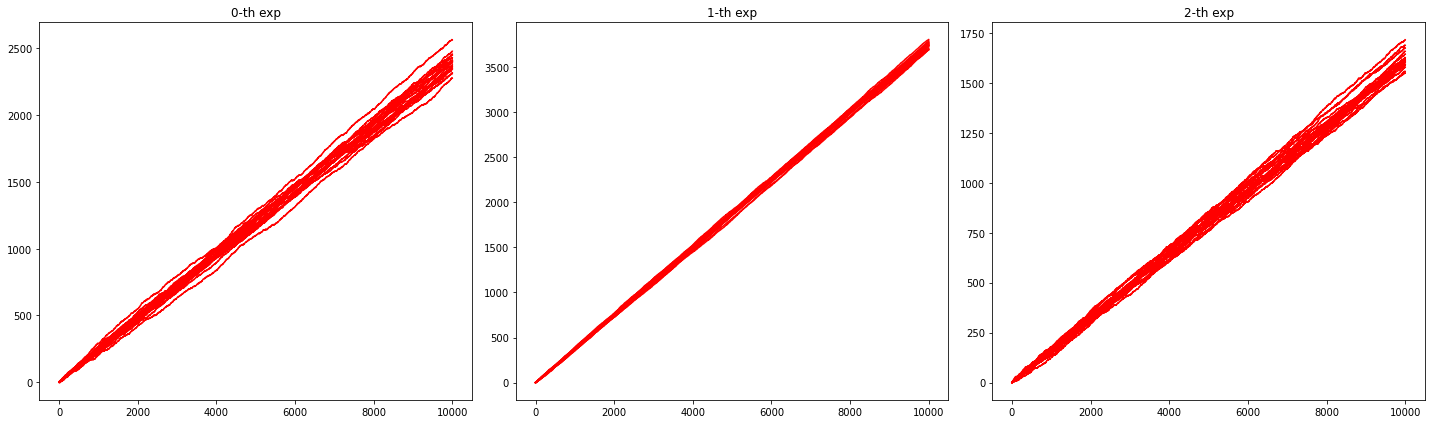

In [49]:
paths_to_read_from = ['experiments/3states_4actions_5obs/bandit3/exp0', 'experiments/3states_4actions_5obs/bandit4/exp0',
                      'experiments/3states_4actions_5obs/bandit5/exp0']

fig, axs = plt.subplots(1, 3, figsize=(20, 6))  #, sharex=True, sharey=True)

exp_data = []
for i, path in enumerate(paths_to_read_from):
    # Opening JSON file
    f = open(path + '/exp_info.json')
    # returns JSON object as
    # a dictionary
    data = json.load(f)
    oracle_list = np.array(data['rewards']['oracle'])
    # sliding_w_UCB_list = np.array(data['rewards']['sliding_w_UCB'])
    epsilon_greedy_list = np.array(data['rewards']['epsilon_greedy'])
    exp3S_list = np.array(data['rewards']['exp3S'])
    our_policy_list = np.array(data['rewards']['our_policy'])


    oracle_rewards = oracle_list[:, :, 1]
    x_axis = [i for i in range(oracle_rewards.shape[1])]


    # sliding_w_UCB_regret = np.mean(oracle_rewards - sliding_w_UCB_list[:, :, 1], axis=0)
    epsilon_greedy_regret = np.mean(oracle_rewards - epsilon_greedy_list[:, :, 1], axis=0)
    exp3S_regret = np.mean(oracle_rewards - exp3S_list[:, :, 1], axis=0)


    our_policy_regret = np.mean(oracle_rewards - our_policy_list[:, :, 1], axis=0)
    our_policy_regret_std = np.std(oracle_rewards - our_policy_list[:, :, 1], axis=0, ddof=1)

    cum_policy_regret = np.cumsum(oracle_rewards - our_policy_list[:, :, 1], axis=1)
    mean_cum_policy_regret = np.mean(cum_policy_regret, axis=0)
    std_cum_policy_regret = np.std(cum_policy_regret, axis=0)

    cusum_our_policy_regret = np.cumsum(our_policy_regret)
    cusum_our_policy_regret_std = np.std(cusum_our_policy_regret, ddof=1)


    # our_policy_low, our_policy_high = ci(our_policy_regret, our_policy_regret_std, our_policy_list.shape[0])
    our_policy_low, our_policy_high = ci2(our_policy_regret, our_policy_regret_std, our_policy_list.shape[0])
    #lower_bound, upper_bound = ci2(cusum_our_policy_regret, cusum_our_policy_regret_std, our_policy_list.shape[0])
    #print(our_policy_regret_std.shape)
    print(our_policy_regret.shape)
    print(our_policy_list.shape[0])
    print(oracle_rewards.shape)
    print(our_policy_low)



    #print(f"sliding_w_UCB regret {sliding_w_UCB_regret.sum()}")
    #axs[i].plot(np.cumsum(sliding_w_UCB_regret), 'c')

    print(f"Epsilon greedy regret {epsilon_greedy_regret.sum()}")
    #axs[i].plot(np.cumsum(epsilon_greedy_regret), 'b')

    print(f"Exp3S regret {exp3S_regret.sum()}")
    #axs[i].plot(np.cumsum(exp3S_regret), 'g')

    print(f"Our policy regret {our_policy_regret.sum()}")
    #for row in range(oracle_rewards.shape[0]):
    axs[i].plot(np.cumsum(oracle_rewards - our_policy_list[:, :, 1]), 'r')
    axs[i].fill_between(x_axis, np.cumsum(our_policy_low), np.cumsum(our_policy_high), alpha=0.2)

    axs[i].set_title(f"{i}-th exp")

plt.tight_layout()
plt.show()